# Berry curvature of Haldane Model

In [1]:
# ----------------------------------
# Berry curvature of Haldane model
# ----------------------------------

from __future__ import print_function # python3 style print
from pythtb import * # import TB model class


import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
%matplotlib inline
rcParams.update({"text.usetex": True, "font.size": 16})

In [2]:
# define setup of Haldane model
def set_model(delta,t,t2):
  lat=[[1.0,0.0],[0.5,np.sqrt(3.0)/2.0]]
  orb=[[1./3.,1./3.],[2./3.,2./3.]]
  model=tb_model(2,2,lat,orb)
  model.set_onsite([-delta,delta])
  for lvec in ([ 0, 0], [-1, 0], [ 0,-1]):
    model.set_hop(t, 0, 1, lvec)
  for lvec in ([ 1, 0], [-1, 1], [ 0,-1]):
    model.set_hop(t2*1.j, 0, 0, lvec)
  for lvec in ([-1, 0], [ 1,-1], [ 0, 1]):
    model.set_hop(t2*1.j, 1, 1, lvec)
  return model

In [3]:
# miscellaneous setup
delta=0.7   # site energy shift
t=-1.0      # real first-neighbor hopping

nk=61
dk=2.*np.pi/(nk-1)
k0=(np.arange(nk-1)+0.5)/(nk-1)
kx=np.zeros((nk-1,nk-1),dtype=float)
ky=np.zeros((nk-1,nk-1),dtype=float)
sq3o2=np.sqrt(3.)/2.
for i in range(nk-1):
  for j in range(nk-1):
    kx[i,j]=sq3o2*k0[i]
    ky[i,j]= -0.5*k0[i]+k0[j]

Chern number = -0.00000
Chern number =  0.00000
Chern number =  1.00000


C:\Users\myhanna\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: No contour levels were found within the data range.


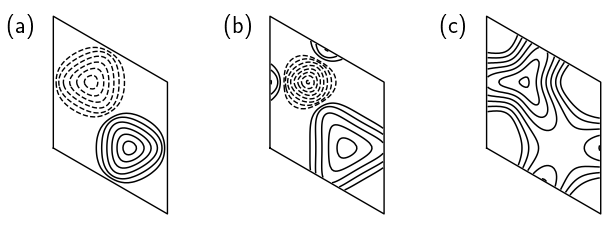

In [4]:
fig,ax=plt.subplots(1,3,figsize=(11,4))
labs=['(a)','(b)','(c)']

# compute Berry curvature and Chern number for three values of t2
for j,t2 in enumerate([0.,-0.06,-0.24]):
  my_model=set_model(delta,t,t2)
  my_array=wf_array(my_model,[nk,nk])
  my_array.solve_on_grid([0.,0.])
  bcurv=my_array.berry_flux([0],individual_phases=True)/(dk*dk)
  chern=my_array.berry_flux([0])/(2.*np.pi)
  print('Chern number =',"%8.5f"%chern)
  
  # make contour plot of Berry curvature
  pos_lvls= 0.02*np.power(2.,np.linspace(0,8,9))
  neg_lvls=-0.02*np.power(2.,np.linspace(8,0,9))
  ax[j].contour(kx,ky,bcurv,levels=pos_lvls,colors='k')
  ax[j].contour(kx,ky,bcurv,levels=neg_lvls,colors='k',linewidths=1.4)

  # remove rectangular box and draw parallelogram, etc.
  ax[j].xaxis.set_visible(False)
  ax[j].yaxis.set_visible(False)
  for loc in ["top","bottom","left","right"]:
    ax[j].spines[loc].set_visible(False)
  ax[j].set(aspect=1.)
  ax[j].plot([0,sq3o2,sq3o2,0,0],[0,-0.5,0.5,1,0],color='k',linewidth=1.4)
  ax[j].set_xlim(-0.05,sq3o2+0.05)
  ax[j].text(-.35,0.88,labs[j],size=24.)

#fig.savefig("haldane_bcurv.pdf")
plt.show()